<table align="left" width=100%>
    <tr>
        <td width="12%">
            <img src="../../../images/RA_Logo.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b>Bike Price Prediction Model </b>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

In [2]:
!dir *.CSV


 Volume in drive C is Windows
 Volume Serial Number is 68B7-69C8

 Directory of C:\Users\91888\Downloads

26-09-2024  18:35            66,450 BIKE DETAILS.csv
06-08-2024  19:18             1,536 cs13138258115342541033.csv
22-07-2024  21:29           191,864 Data Science Salary 2021 to 2023.csv
01-08-2024  17:34             5,484 possum.csv
04-08-2024  11:40            26,107 sample_submission - sample_submission.csv.csv
04-08-2024  12:13            31,939 sample_submission.csv
04-08-2024  11:39           452,863 test - test.csv.csv
04-08-2024  11:23           460,676 train (1).csv
04-08-2024  11:38           462,135 train - train.csv.csv
               9 File(s)      1,699,054 bytes
               0 Dir(s)  292,507,308,032 bytes free


In [3]:
import os

# Use 'dir' for Windows
os.system('dir')

0

In [6]:
df = pd.read_csv('BIKE DETAILS.csv')

In [5]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(1061, 7)

In [7]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


This output provides you with an overview of the DataFrame, such as the number of rows and columns, the column 
names, the data types, and memory usage. 
It's a handy tool for quickly understanding the structure of your dataset and identifying any missing values or
potential data type issues.

In [8]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [9]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
name,Royal Enfield Classic 350,Honda Dio,Royal Enfield Classic Gunmetal Grey,Yamaha Fazer FI V 2.0 [2016-2018],Yamaha SZ [2013-2014]
selling_price,175000,45000,150000,65000,20000
year,2019,2017,2018,2015,2011
seller_type,Individual,Individual,Individual,Individual,Individual
owner,1st owner,1st owner,1st owner,1st owner,2nd owner
km_driven,350,5650,12000,23000,21000
ex_showroom_price,NaN,NaN,148114.000000,89643.000000,NaN


In this above example, df.head() is applied to the DataFrame first, showing the first 5 rows. 
Then, df.transpose() is applied to the result, swapping the rows and columns of those 5 rows. 
This can be useful when you want to examine the initial data points across columns more closely.

In [10]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.000000


We can adjust the number of rows displayed by passing the desired number as an argument to df.tail(). 
For example, df.tail(10) would show the last 10 rows of the DataFrame, and 
df.tail(1) would display only the very last row.

This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in
the DataFrame. 
It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [11]:
#2_1.Type Casting (astype) 

In [12]:
#3 - Missing Value Treatment

In [13]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [14]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
ex_showroom_price,435,40.999057,float64
name,0,0.000000,object
selling_price,0,0.000000,int64
year,0,0.000000,int64
seller_type,0,0.000000,object
owner,0,0.000000,object
km_driven,0,0.000000,int64


In [15]:
#4_1_1. Five point summary - df.describe()
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,626.000000
mean,59638.151744,2013.867107,34359.833176,87958.714058
std,56304.291973,4.301191,51623.152702,77496.587189
min,5000.000000,1988.000000,350.000000,30490.000000
25%,28000.000000,2011.000000,13500.000000,54852.000000
50%,45000.000000,2015.000000,25000.000000,72752.500000
75%,70000.000000,2017.000000,43000.000000,87031.500000
max,760000.000000,2020.000000,880000.000000,1278000.000000


In [16]:
df.columns
import matplotlib.pyplot as plt

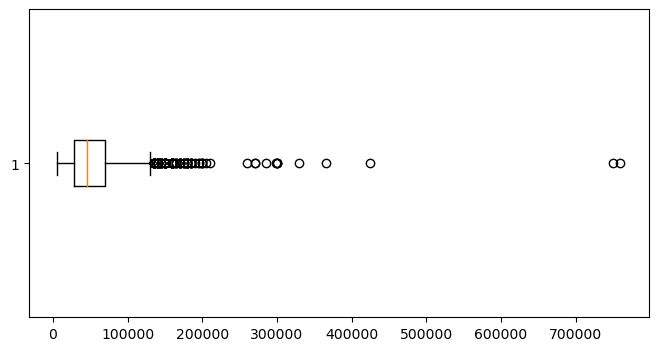

In [17]:
plt.figure(figsize=(8, 4))
plt.boxplot(x='selling_price', data=df, vert=False)
plt.show()

This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in the DataFrame. It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [18]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
df.describe(include=object)

,name,seller_type,owner
count,1061,1061,1061
unique,279,2,4
top,Bajaj Pulsar 150,Individual,1st owner
freq,41,1055,924


In [19]:
#4_1_2. Five point summary for categorical columns
df.describe(exclude=np.number)

,name,seller_type,owner
count,1061,1061,1061
unique,279,2,4
top,Bajaj Pulsar 150,Individual,1st owner
freq,41,1055,924


In [20]:
# check the categories of the variable 'mainroad' 
print('Categories in Name:', df.name.unique())

Categories in Name: ['Royal Enfield Classic 350' 'Honda Dio'
 'Royal Enfield Classic Gunmetal Grey' 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Yamaha SZ [2013-2014]' 'Honda CB Twister' 'Honda CB Hornet 160R'
 'Royal Enfield Bullet 350 [2007-2011]' 'Hero Honda CBZ extreme'
 'Bajaj Discover 125' 'Yamaha FZ16' 'Honda Navi'
 'Bajaj Avenger Street 220' 'Yamaha YZF R3' 'Jawa 42'
 'Suzuki Access 125 [2007-2016]' 'Hero Honda Glamour' 'Yamaha YZF R15 S'
 'Yamaha FZ25' 'Hero Passion Pro 110' 'Honda Navi [2016-2017]'
 'Honda Activa i' 'Jawa Standard' 'Royal Enfield Thunderbird 350'
 'Honda Dream Yuga' 'TVS Apache RTR 160 4V' 'Yamaha Fazer [2009-2016]'
 'Hero Honda Splendor NXG' 'Hero Glamour 125' 'Yamaha FZ S [2012-2016]'
 'Hero Xtreme Sports' 'Honda X-Blade' 'Honda CB Shine SP'
 'Honda Activa 5G' 'Honda CBR-250R' 'Hero Honda Passion PRO [2012]'
 'Bajaj Dominar 400' 'Hero Glamour FI' 'KTM 390 Duke' 'Hero Passion XPro'
 'Yamaha FZ S V 2.0' 'Hero Achiever 150' 'Yamaha Saluto'
 'Bajaj Discover 100' 'Hond

In [21]:
df.name.value_counts()

Bajaj Pulsar 150                              41
Royal Enfield Classic 350                     27
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Royal Enfield Thunderbird 350                 19
Hero Honda Splendor Plus                      17
Bajaj Discover 125                            16
Yamaha FZ S V 2.0                             16
Honda Activa 3G                               15
Honda Shine                                   15
Honda CB Unicorn 150                          14
TVS Apache RTR 160                            14
Bajaj Pulsar 135 LS                           13
Honda Activa 5G                               12
Yamaha FZ16                                   12
Bajaj Pulsar 150 [2001-2011]                  11
Hero Glamour 125                              11
Bajaj Discover 100                            11
Hero Honda CBZ extreme                        11
Bajaj Avenger Street

In [22]:
# check the categories of the variable 'guestroom' 
print('Categories in seller_type:', df.seller_type.unique())

Categories in seller_type: ['Individual' 'Dealer']


In [23]:
df.seller_type.value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [24]:
# check the categories of the variable 'Item_Type' 
print('Categories in owner:', df.owner.unique())

Categories in owner: ['1st owner' '2nd owner' '3rd owner' '4th owner']


In [25]:
df.owner.value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [26]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

selling_price       3170173294.583562
year                        18.500247
km_driven           2664949894.852334
ex_showroom_price   6005721026.012517
dtype: float64

The variance indicates how much is the data varying from the mean. 
The output suggests that the variable bathrooms has the least variance and the variable price has the maximum variance.

In [27]:
df.std(numeric_only=True)

selling_price       56304.291973
year                    4.301191
km_driven           51623.152702
ex_showroom_price   77496.587189
dtype: float64

Interpretation: We can see that the variable 'bathrooms' has a standard deviation near to zero. 
It indicates that there is not much variability. 
Thus this variable does not add much value to the analysis and can be further removed from the study.
However, it is not sensible to compare variation in variables having different units because they vary in their respective units and the means about which they occur.

In [28]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

In [29]:
df_num.columns

Index(['selling_price', 'year', 'km_driven', 'ex_showroom_price'], dtype='object')

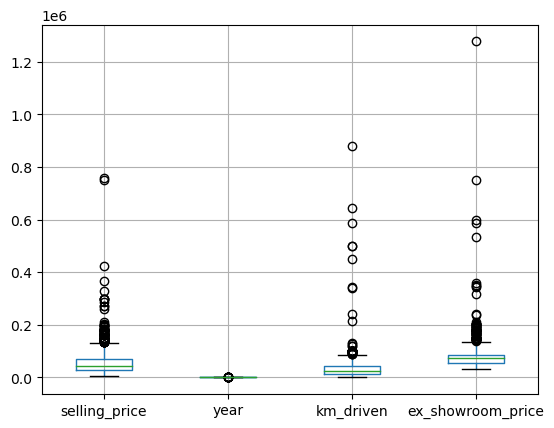

In [30]:
df_num.boxplot()
plt.show()

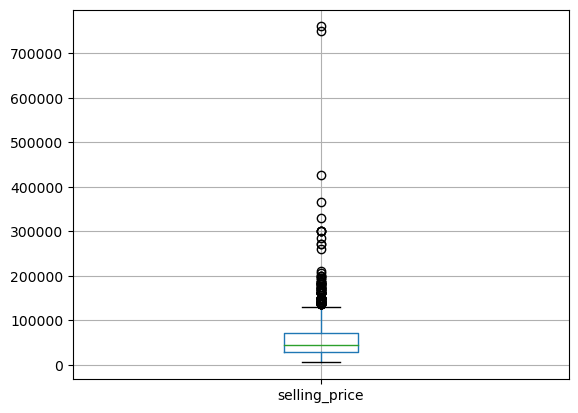

In [31]:
df_num.boxplot(column='selling_price')
plt.show()

In [32]:
# filter the categorical variables from the data
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['name', 'seller_type', 'owner'], dtype='object')

In [33]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

selling_price       42000.000000
year                    6.000000
km_driven           29500.000000
ex_showroom_price   32179.500000
dtype: float64


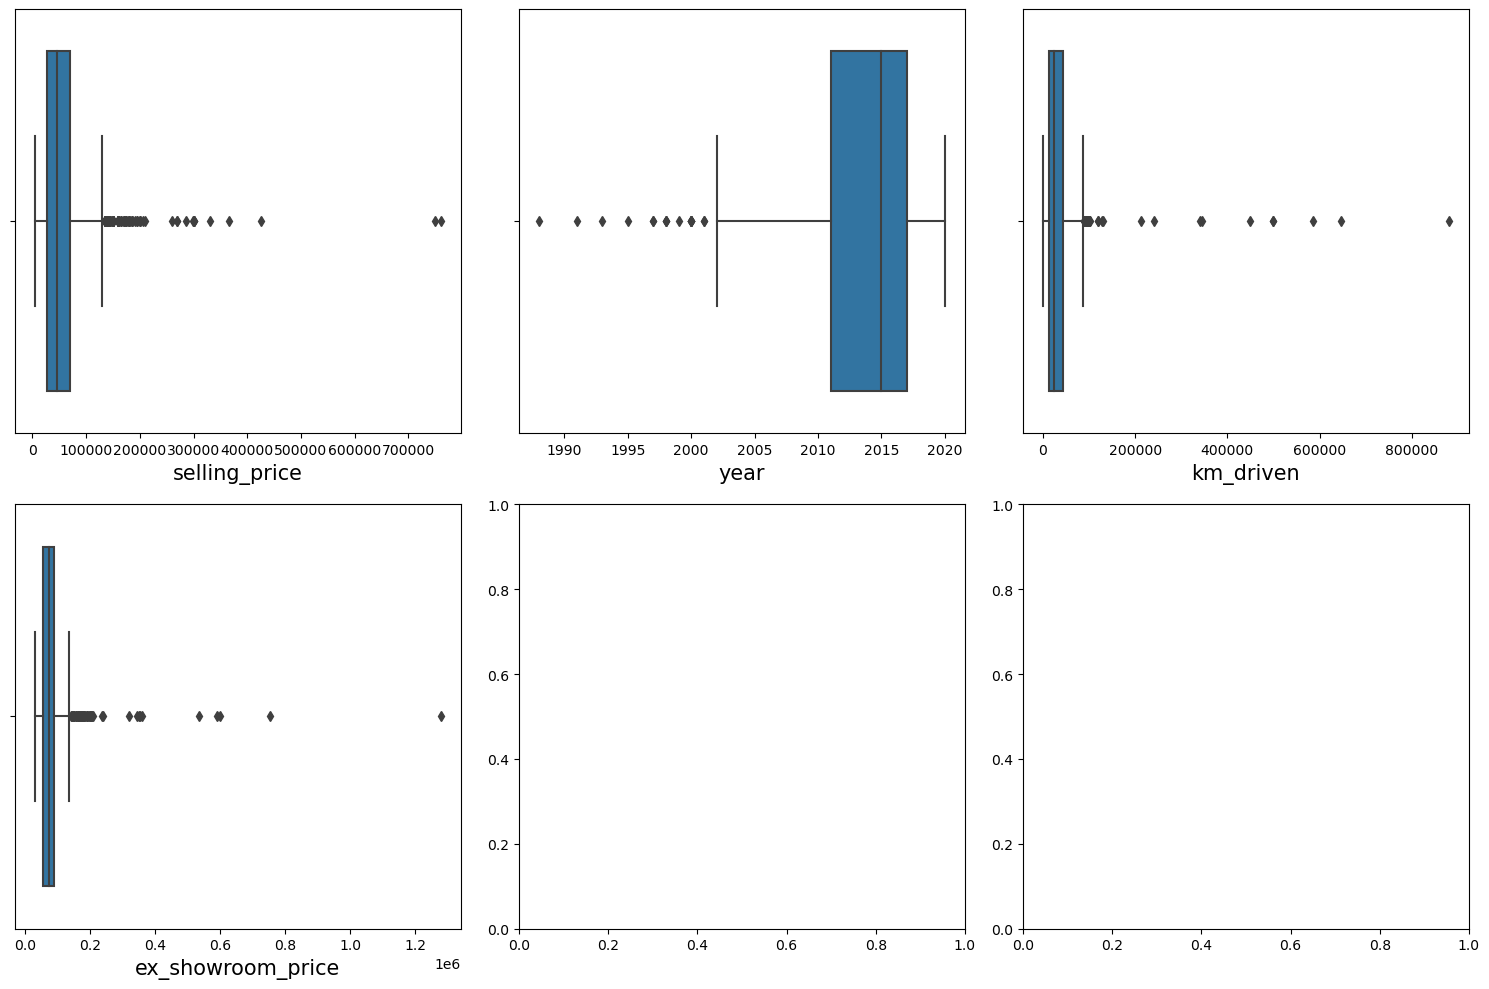

In [34]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=np.number)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

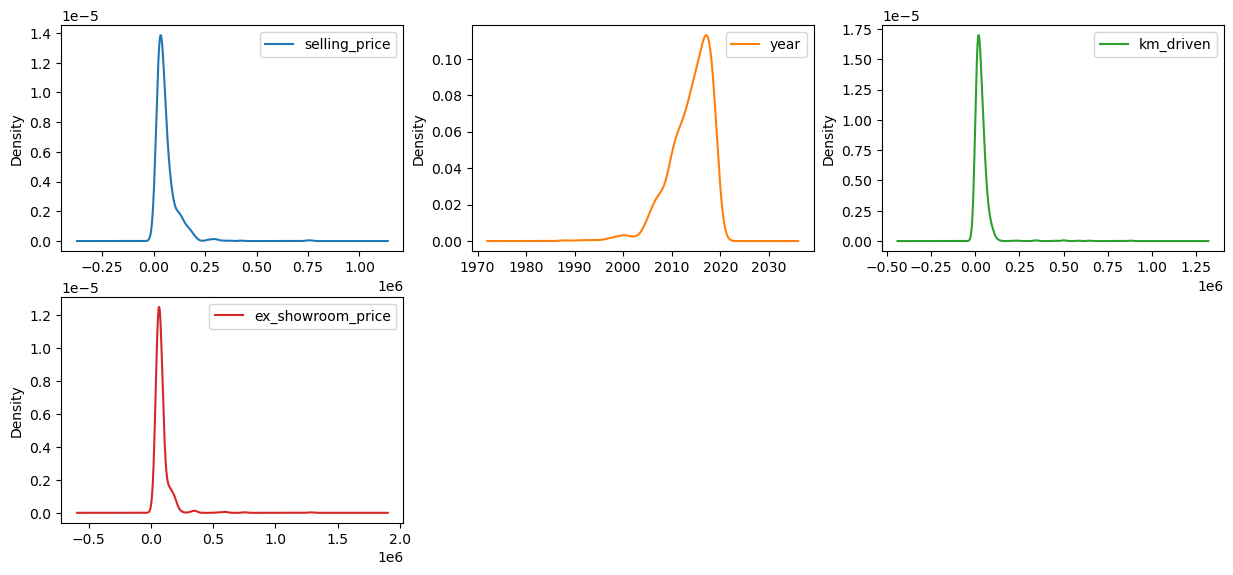

In [35]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

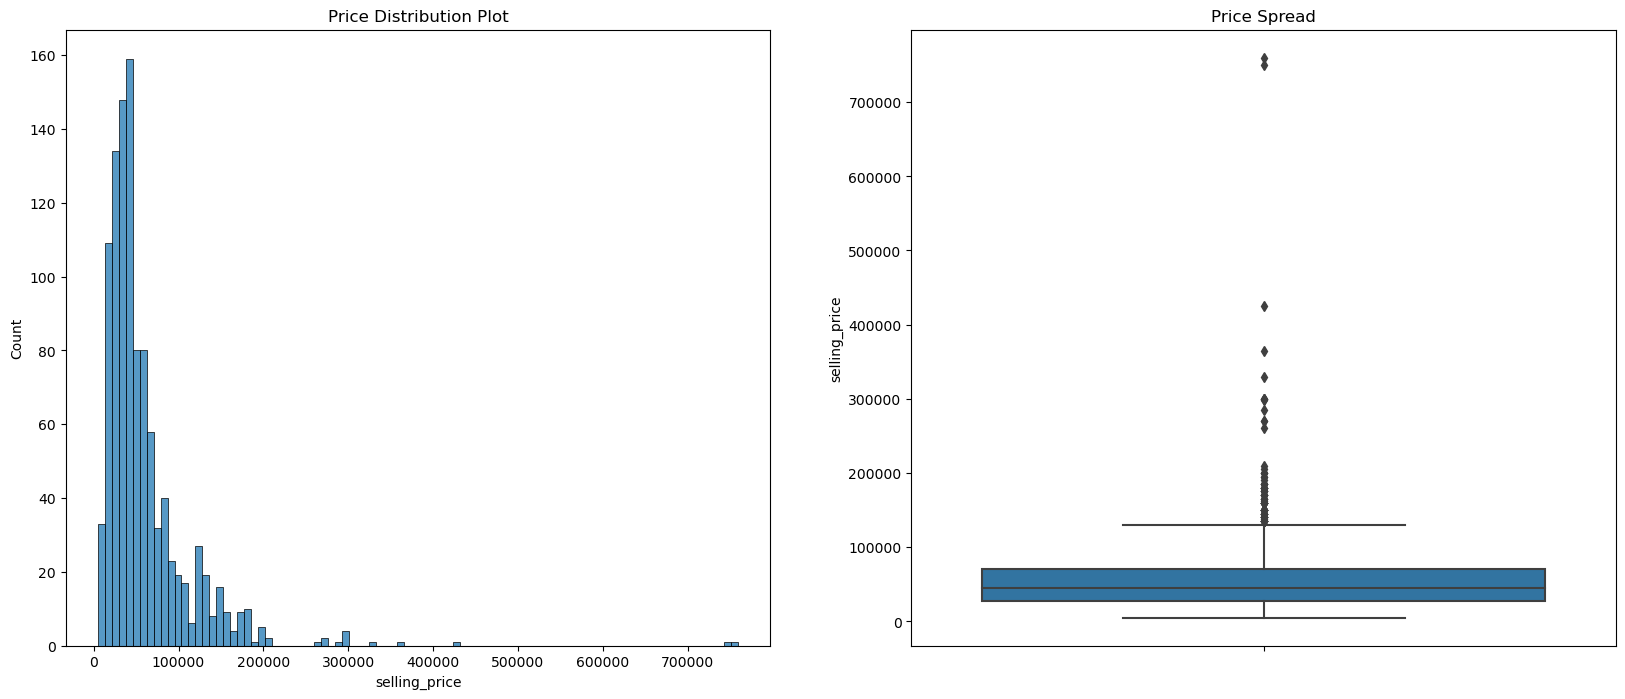

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df.selling_price)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.selling_price)

plt.show()

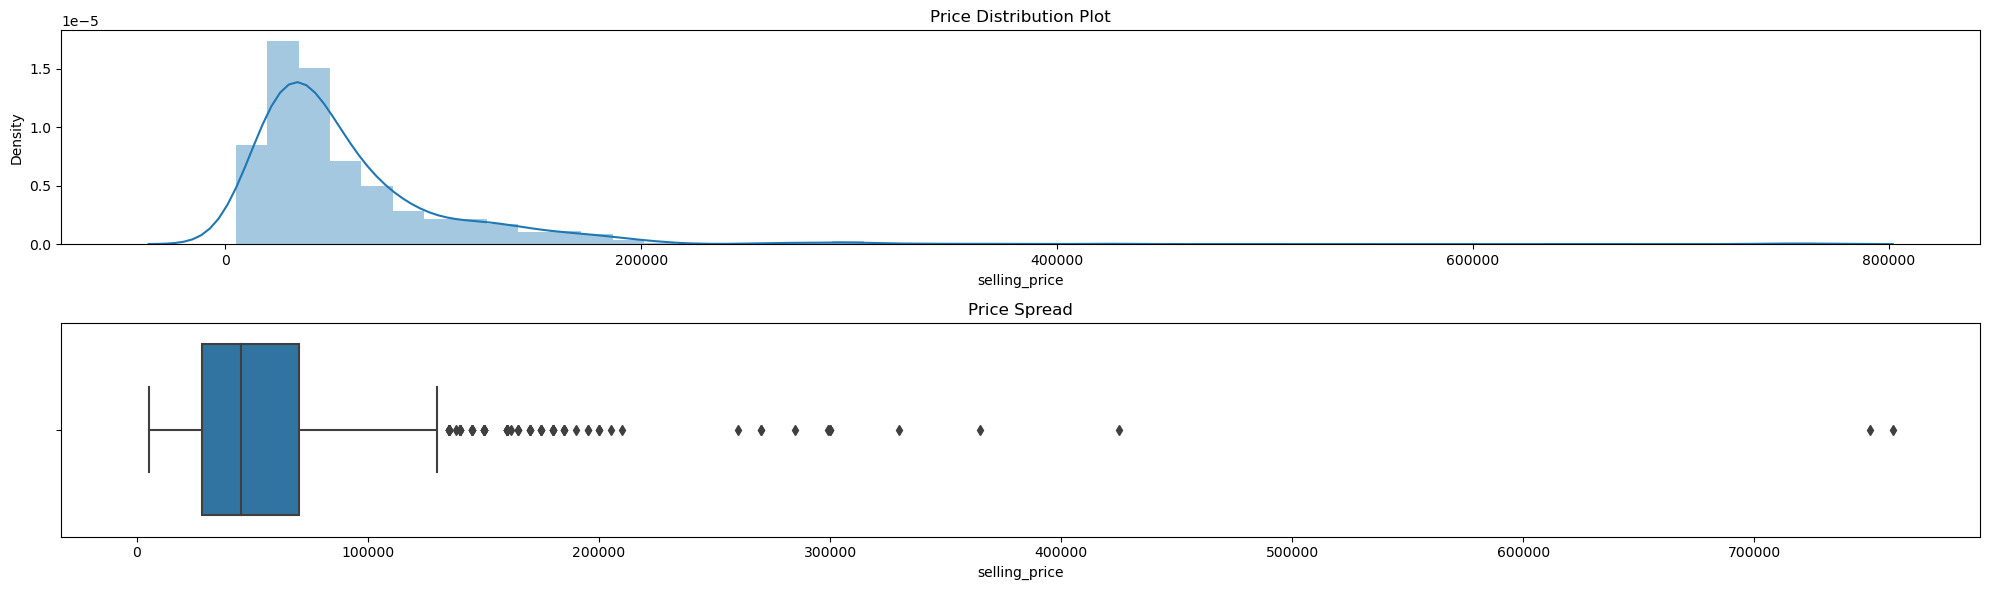

In [37]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.distplot(df.selling_price)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.selling_price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [38]:
df_num.selling_price.mean(), df_num.selling_price.median(), df_num.selling_price.mode()

(59638.151743638075,
 45000.0,
 0    25000
 Name: selling_price, dtype: int64)

In [49]:
df_num.selling_price.skew()

4.993784115724287

In [50]:
df_num.selling_price.kurtosis()

47.26308046849691

In [51]:
df_num.selling_price.describe()

count     1061.000000
mean     59638.151744
std      56304.291973
min       5000.000000
25%      28000.000000
50%      45000.000000
75%      70000.000000
max     760000.000000
Name: selling_price, dtype: float64

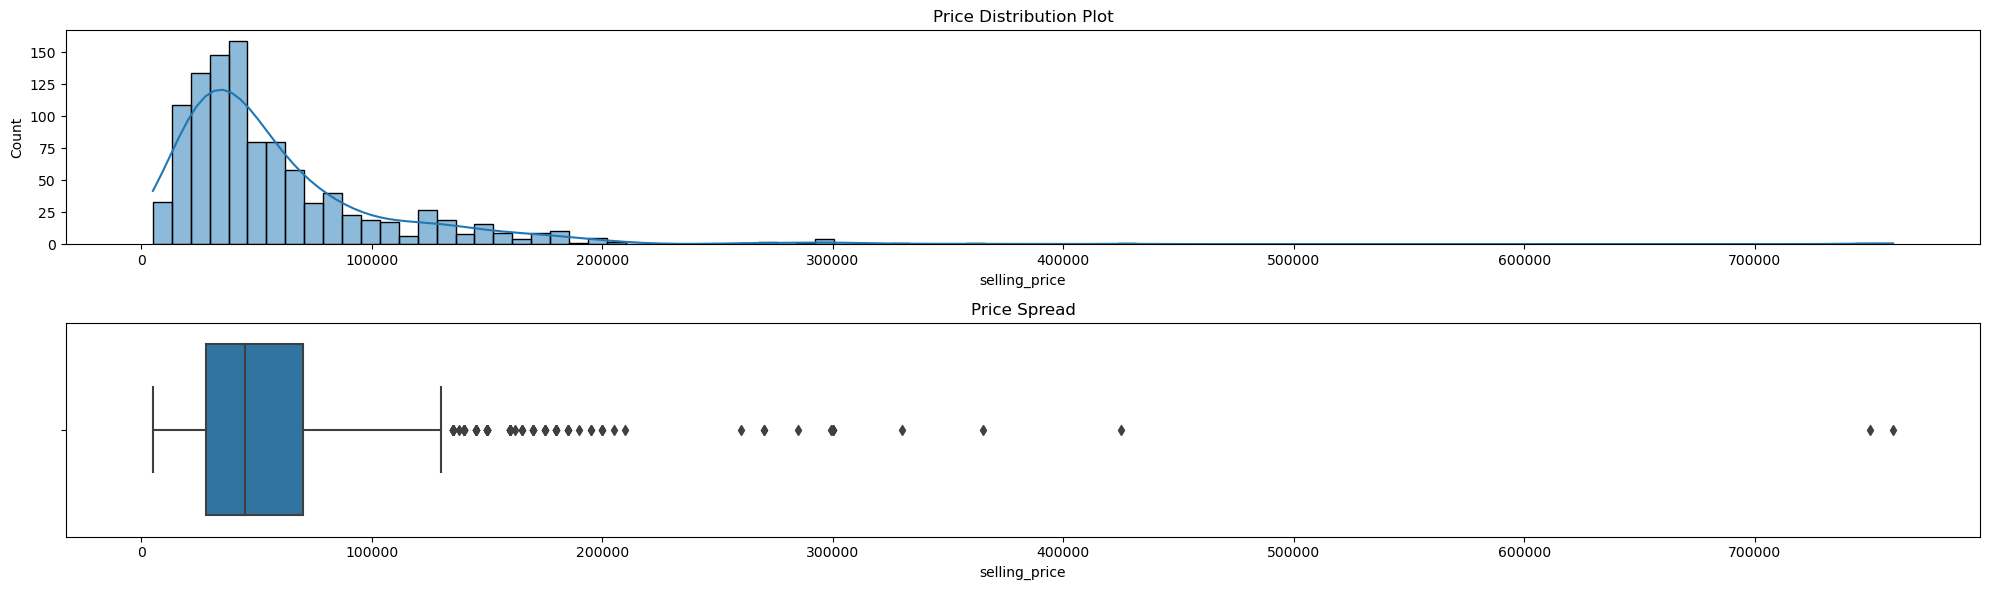

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.histplot(df.selling_price, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.selling_price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [53]:
df_num.columns

Index(['selling_price', 'year', 'km_driven', 'ex_showroom_price'], dtype='object')

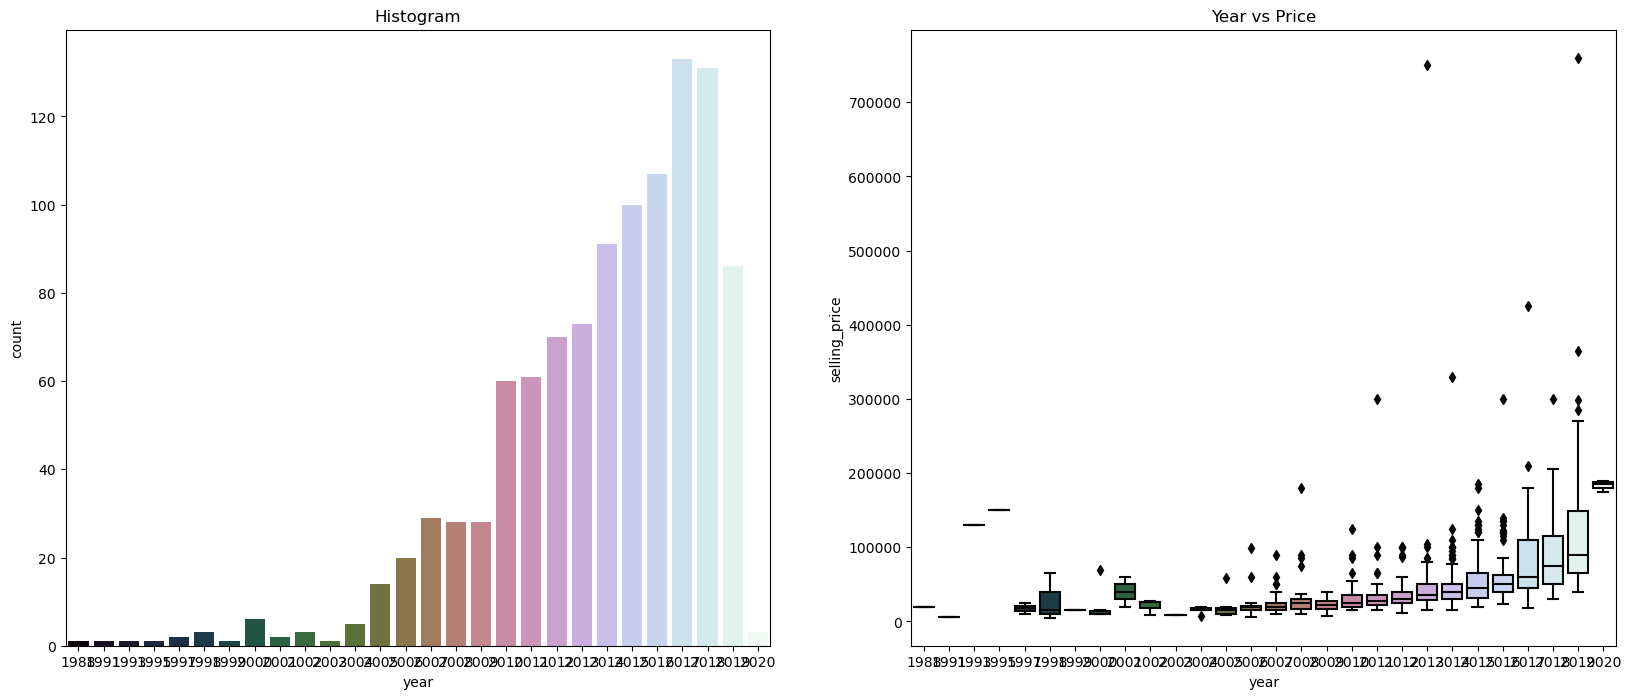

In [55]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='year', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title('Year vs Price')
sns.boxplot(data=df, x='year', y='selling_price', palette=("cubehelix"))

plt.show()

In [56]:
df_num.columns

Index(['selling_price', 'year', 'km_driven', 'ex_showroom_price'], dtype='object')

In [57]:
df_num.year.value_counts()

2017    133
2018    131
2016    107
2015    100
2014     91
2019     86
2013     73
2012     70
2011     61
2010     60
2007     29
2008     28
2009     28
2006     20
2005     14
2000      6
2004      5
2002      3
2020      3
1998      3
1997      2
2001      2
1988      1
1999      1
1991      1
2003      1
1993      1
1995      1
Name: year, dtype: int64

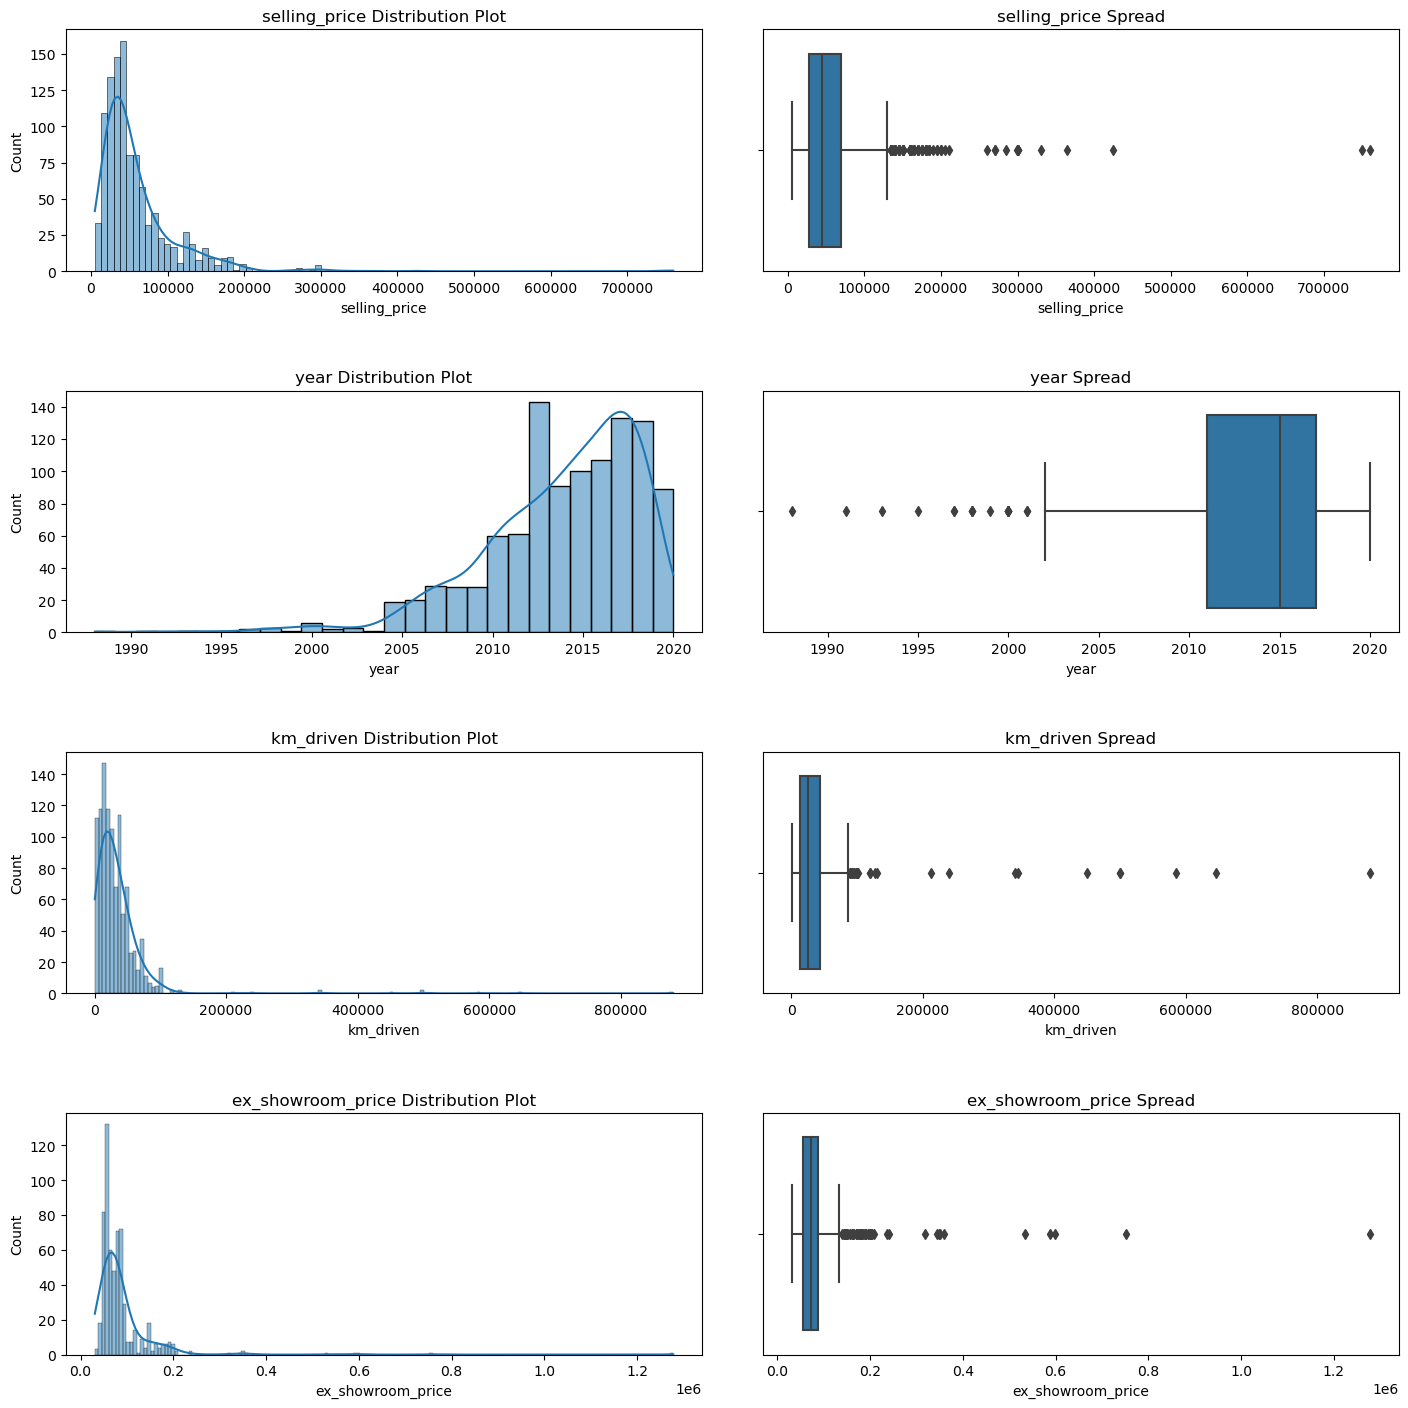

In [58]:
# Determine the number of rows and columns for subplots based on the number of numeric columns
n_rows = len(df_num.columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(df_num.columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

In [59]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

selling_price        4.993784
year                -1.397296
km_driven            9.312195
ex_showroom_price    8.438888
dtype: float64


In [60]:
# use kurt() to calculate the kurtosis
df.kurt(numeric_only=True)

selling_price        47.263080
year                  3.223544
km_driven           115.815305
ex_showroom_price   104.396578
dtype: float64

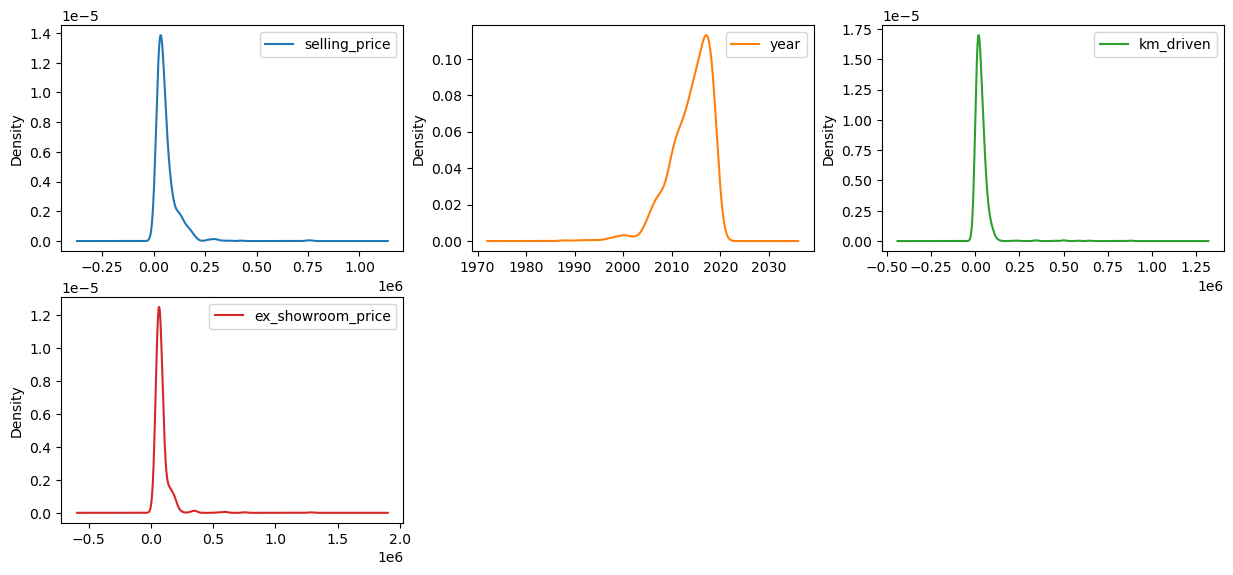

In [61]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [62]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

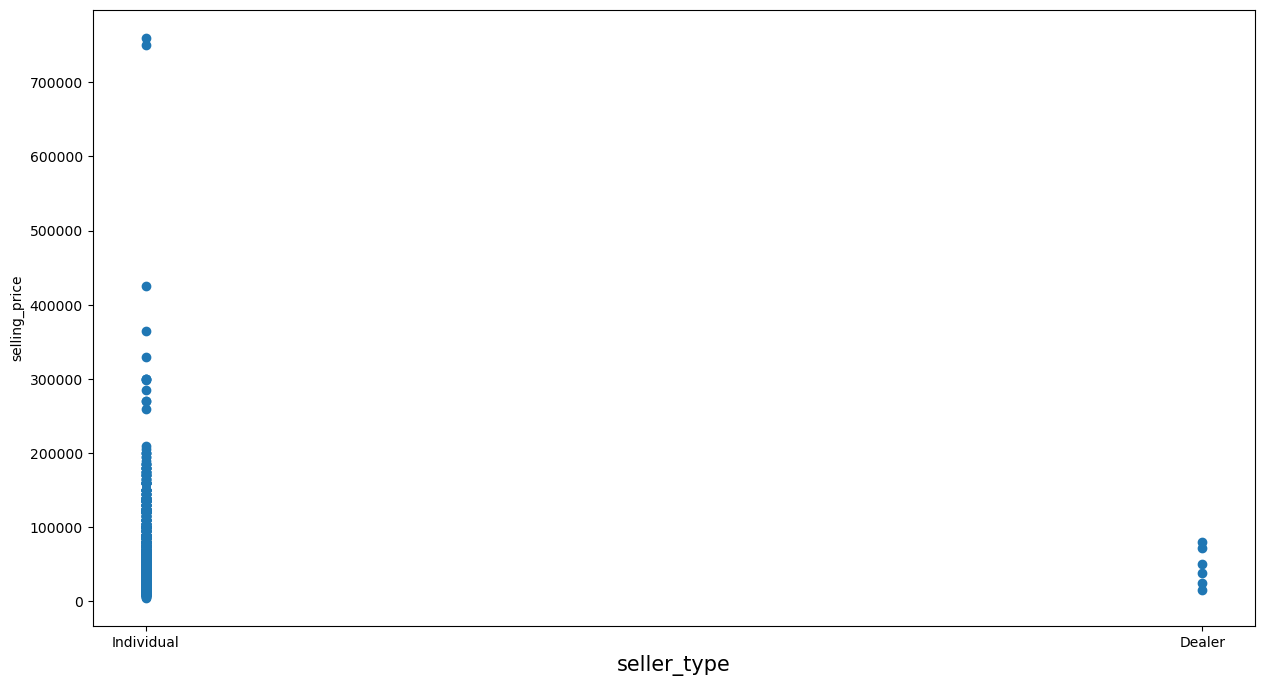

In [65]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["seller_type"], df["selling_price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("seller_type", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('selling_price')
plt.show()

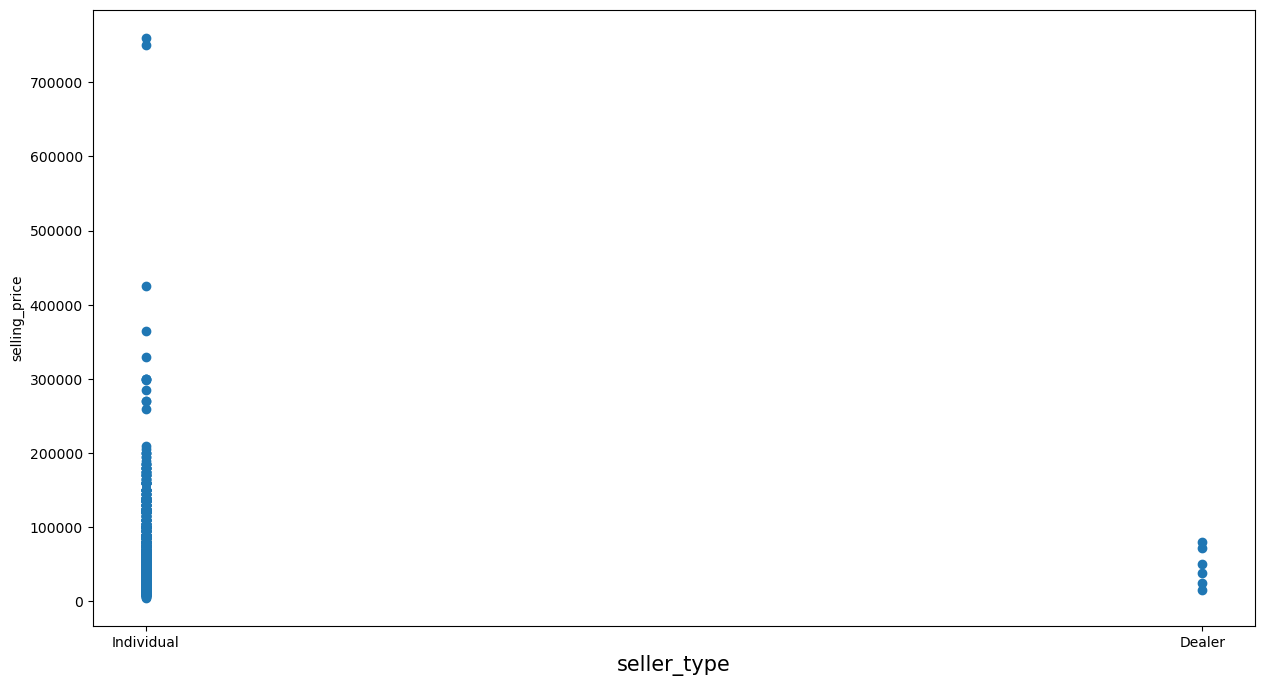

In [67]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["seller_type"], df["selling_price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("seller_type", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('selling_price')
plt.show()

In [72]:
# removing features that are less correlated with our target variable
df_num.corr().selling_price[df_num.corr().selling_price <= 0.05]


km_driven   -0.212937
Name: selling_price, dtype: float64

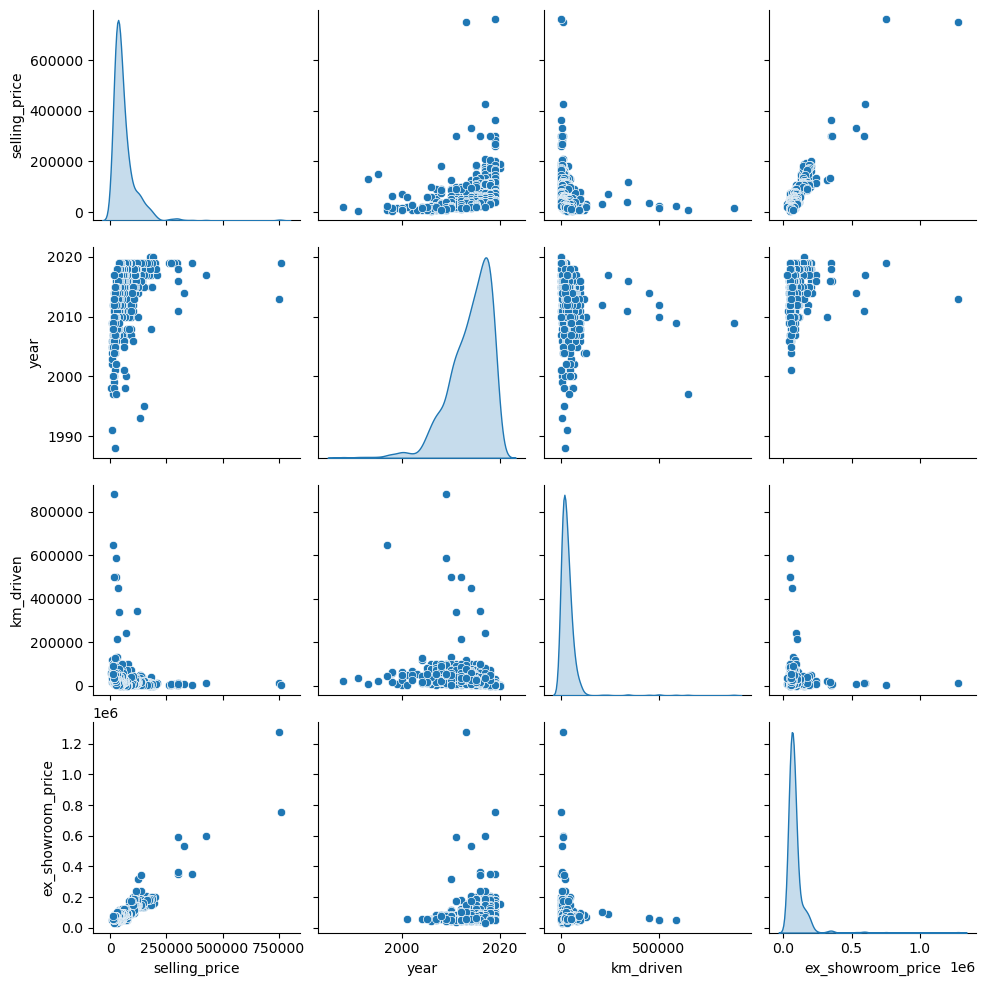

In [74]:
sns.pairplot(data=df_num, diag_kind='kde')
plt.show()

In [71]:
# Do type casting and impute missing values - mean/median and mode (categorical)

In [72]:
# skew - -0.5 to +0.5 - acceptance

In [75]:
df.skew(numeric_only=True)

selling_price        4.993784
year                -1.397296
km_driven            9.312195
ex_showroom_price    8.438888
dtype: float64

In [76]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [77]:
df.selling_price.describe()

count     1061.000000
mean     59638.151744
std      56304.291973
min       5000.000000
25%      28000.000000
50%      45000.000000
75%      70000.000000
max     760000.000000
Name: selling_price, dtype: float64

In [78]:
df_cat.columns

Index(['name', 'seller_type', 'owner'], dtype='object')

In [79]:
df_num.columns

Index(['selling_price', 'year', 'km_driven', 'ex_showroom_price'], dtype='object')

In [86]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


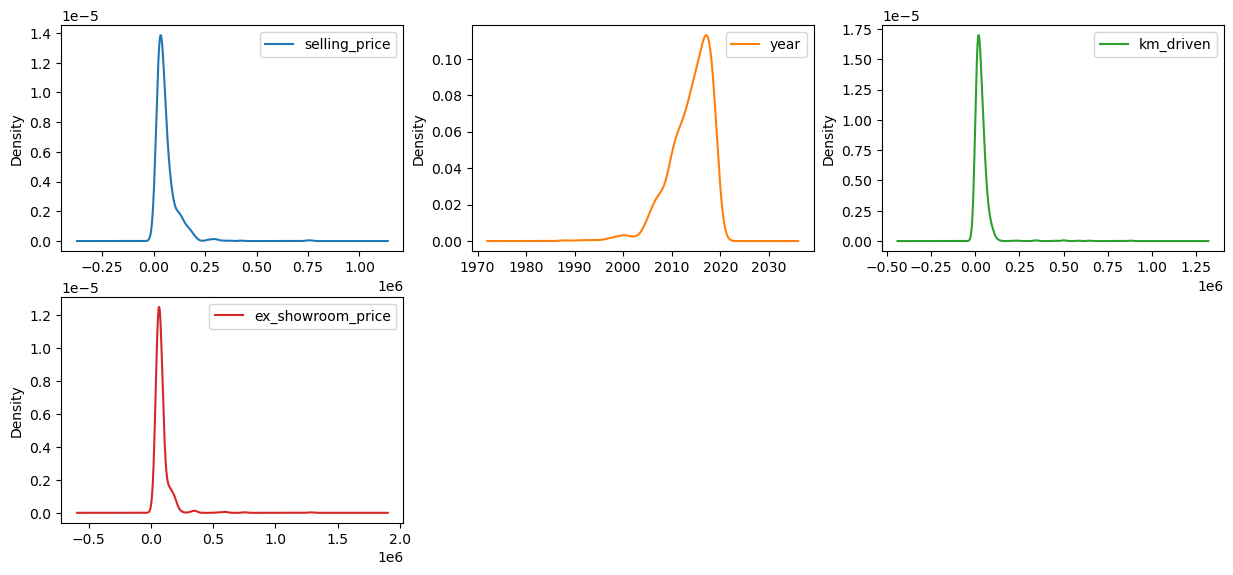

In [90]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [91]:
df_cat.columns

Index(['name', 'seller_type', 'owner'], dtype='object')

In [92]:
df_cat.head()

,name,seller_type,owner
0,Royal Enfield Classic 350,Individual,1st owner
1,Honda Dio,Individual,1st owner
2,Royal Enfield Classic Gunmetal Grey,Individual,1st owner
3,Yamaha Fazer FI V 2.0 [2016-2018],Individual,1st owner
4,Yamaha SZ [2013-2014],Individual,2nd owner


In [93]:
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head(10)

,name_Activa 4g,name_Aprilia SR 125,name_BMW G310GS,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,name_Bajaj Avenger Cruise 220,name_Bajaj Avenger Street 150 [2018],name_Bajaj Avenger Street 160,name_Bajaj Avenger Street 220,name_Bajaj Avenger [2015],name_Bajaj Boxer,name_Bajaj CT 100,name_Bajaj CT 110,name_Bajaj Discover 100,name_Bajaj Discover 100 M,name_Bajaj Discover 100 T,name_Bajaj Discover 110,name_Bajaj Discover 125,name_Bajaj Discover 125 M,name_Bajaj Discover 125 ST,name_Bajaj Discover 135,name_Bajaj Discover 150,name_Bajaj Discover 150F,name_Bajaj Discover 150S,name_Bajaj Dominar 400,name_Bajaj Dominar 400 [2018],name_Bajaj Kristal,name_Bajaj Platina 100,name_Bajaj Pulsar NS 200,name_Bajaj Pulsar 125,name_Bajaj Pulsar 135 LS,name_Bajaj Pulsar 150,name_Bajaj Pulsar 150 [2001-2011],name_Bajaj Pulsar 180,name_Bajaj Pulsar 180F,name_Bajaj Pulsar 220 DTS-i,name_Bajaj Pulsar 220 F,name_Bajaj Pulsar 220 Fi,name_Bajaj Pulsar 220F,name_Bajaj Pulsar 220S,name_Bajaj Pulsar AS150,name_Bajaj Pulsar AS200,name_Bajaj Pulsar NS 200,name_Bajaj Pulsar NS160,name_Bajaj Pulsar NS200,name_Bajaj Pulsar RS 200,name_Bajaj Pulsar RS200,name_Bajaj Super,name_Bajaj V12,name_Bajaj V15,name_Bajaj Xcd,name_Benelli TNT 25,name_Harley-Davidson Street 750,name_Harley-Davidson Street Bob,name_Hero CBZ Xtreme,name_Hero Ignitor Disc,name_Hero Achiever 150,name_Hero CBZ,name_Hero CD Dawn,name_Hero CD Deluxe,name_Hero Duet,name_Hero Extreme,name_Hero Glamour,name_Hero Glamour 125,name_Hero Glamour FI,name_Hero HF Deluxe,name_Hero HF Deluxe i3s,name_Hero Honda Achiever,name_Hero Honda CBZ,name_Hero Honda CBZ extreme,name_Hero Honda CD Deluxe,name_Hero Honda CD100,name_Hero Honda CD100SS,name_Hero Honda Glamour,name_Hero Honda Hunk,name_Hero Honda Karizma,name_Hero Honda Karizma ZMR [2010],name_Hero Honda Passion,name_Hero Honda Passion PRO [2012],name_Hero Honda Passion Plus,name_Hero Honda Passion Pro,name_Hero Honda Pleasure,name_Hero Honda Splendor,name_Hero Honda Splendor NXG,name_Hero Honda Splendor PRO,name_Hero Honda Splendor Plus,name_Hero Honda Street Smart,name_Hero Honda Super Splendor [2005],name_Hero Hunk,name_Hero Ignitor,name_Hero Karizma 2014,name_Hero Karizma ZMR,name_Hero Karizma [2003-2014],name_Hero Maestro,name_Hero Maestro Edge,name_Hero Passion PRO TR,name_Hero Passion PRO i3s,name_Hero Passion Pro,name_Hero Passion Pro 110,name_Hero Passion X Pro [2016-2017],name_Hero Passion X pro,name_Hero Passion XPro,name_Hero Pleasure,name_Hero Pleasure [2005-2015],name_Hero Splender Plus,name_Hero Splender iSmart,name_Hero Splendor NXG,name_Hero Splendor PRO,name_Hero Splendor Plus,name_Hero Splendor Plus i3s,name_Hero Splendor iSmart,name_Hero Super Splendor,name_Hero Xpulse 200,name_Hero Xpulse 200T,name_Hero Xtreme 200R,name_Hero Xtreme 2014,name_Hero Xtreme Sports,name_Hero Xtreme [2013-2014],name_Honda Activa 125,name_Honda Activa 125 [2016-2017],name_Honda Activa 3G,name_Honda Activa 4G,name_Honda Activa 5G,name_Honda Activa [2000-2015],name_Honda Activa i,name_Honda Activa i [2016-2017],name_Honda Aviator,name_Honda CB Hornet 160R,name_Honda CB Shine,name_Honda CB Shine SP,name_Honda CB Trigger,name_Honda CB Twister,name_Honda CB Unicorn,name_Honda CB Unicorn 150,name_Honda CB Unicorn 160,name_Honda CB Unicorn Dazzler,name_Honda CB twister,name_Honda CBF Stunner,name_Honda CBR 150,name_Honda CBR-250R,name_Honda CBR150 R,name_Honda Dio,name_Honda Dream Neo,name_Honda Dream Yuga,name_Honda Dream Yuga,name_Honda Grazia,name_Honda Karizma,name_Honda Livo,name_Honda Navi,name_Honda Navi [2016-2017],name_Honda Shine,name_Honda X-Blade,name_Hyosung GT250R,name_Jawa 42,name_Jawa Standard,name_KTM 125 Duke,name_KTM 200 Duke,name_KTM 250 Duke,name_KTM 390 Duke,name_KTM 390 Duke,name_KTM 390 Duke ABS [2013-2016],name_KTM RC 200,name_KTM RC 390,name_KTM RC200,name_KTM RC390,name_Kawasaki Ninja 250R,name_Kawasaki Ninja 300,name_Kawasaki Ninja 650 [2018-2019],name_Mahindra 

In [94]:
df_cat_encoded.columns

Index(['name_Activa 4g', 'name_Aprilia SR 125', 'name_BMW G310GS',
       'name_Bajaj  ct 100', 'name_Bajaj Avenger 150',
       'name_Bajaj Avenger 150 street', 'name_Bajaj Avenger 220',
       'name_Bajaj Avenger 220 dtsi', 'name_Bajaj Avenger Cruise 220',
       'name_Bajaj Avenger Street 150 [2018]',
       ...
       'name_Yamaha YBR 125', 'name_Yamaha YZF R15 S',
       'name_Yamaha YZF R15 V3', 'name_Yamaha YZF R15 [2011-2018]',
       'name_Yamaha YZF R3', 'name_Yo Style', 'seller_type_Individual',
       'owner_2nd owner', 'owner_3rd owner', 'owner_4th owner'],
      dtype='object', length=282)

In [101]:
X_train.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,1.000000,1.030285,0.123303,-0.599199,-1.103103,1.347305,True,False,True,False,False,True,False,True
363,1.000000,-0.698593,-1.392729,-0.599199,-1.103103,-0.889526,True,False,False,True,False,False,True,False
370,1.000000,-0.241047,-1.392729,-0.599199,-1.103103,1.347305,True,False,False,False,True,False,True,False
31,1.000000,0.976125,0.123303,-0.599199,1.814641,1.347305,True,False,False,False,True,False,True,False
113,1.000000,1.724320,0.123303,-0.599199,-1.103103,1.347305,True,False,True,False,False,True,False,False


In [102]:
import statsmodels
import statsmodels.api as sm

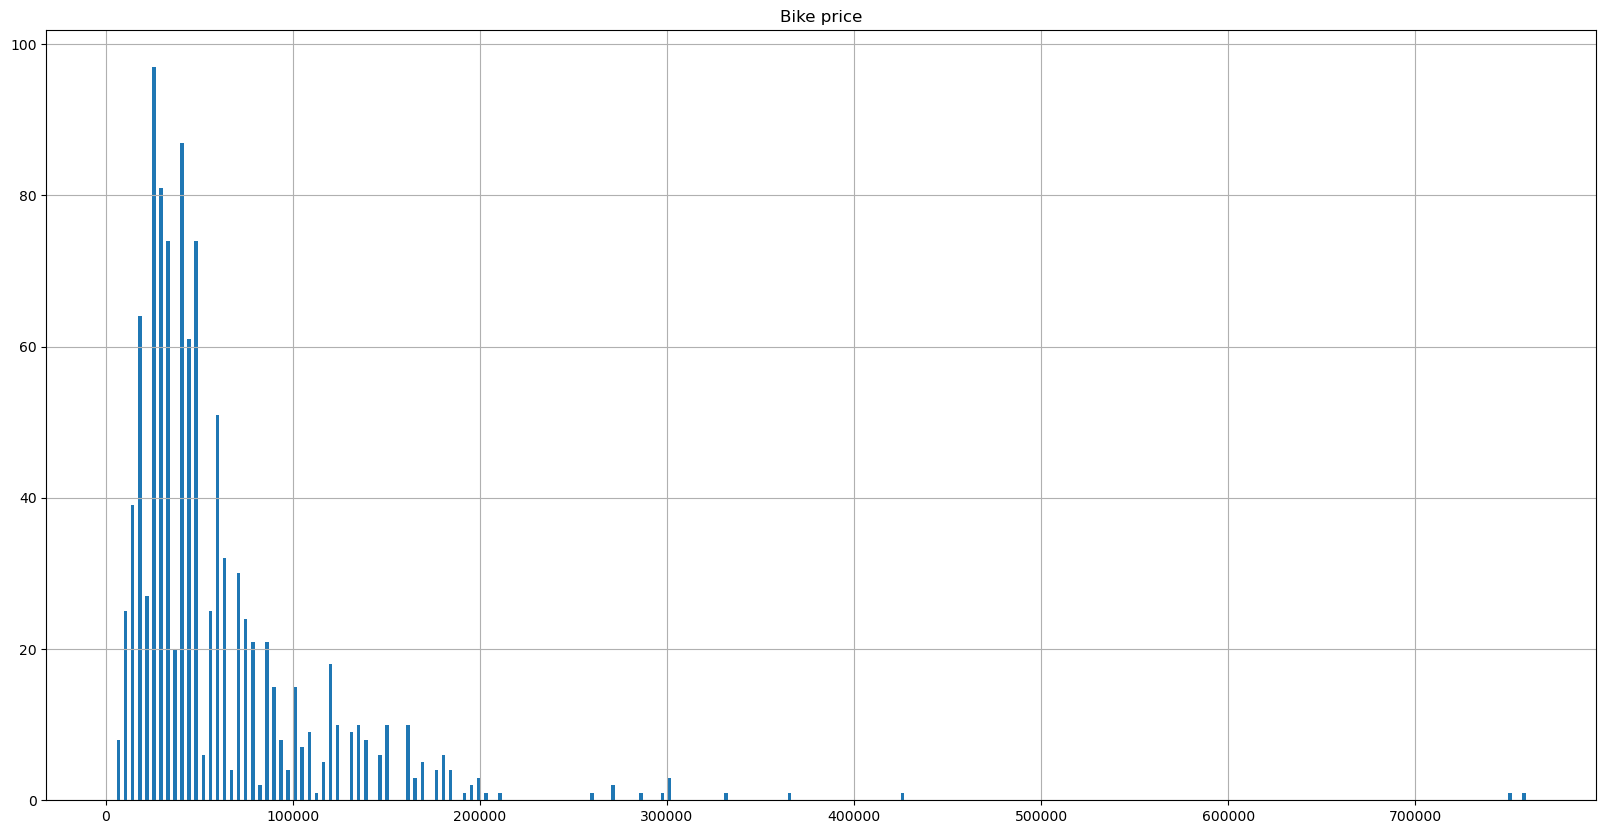

In [102]:
df['selling_price'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('Bike price')
plt.show()